# Experiment 2: Traffic State Snapshot

**Note: move this file to project root directory to run.**

In [1]:
# snapshot plotter
import os
import json
import matplotlib.pyplot as plt
from gatsim.map.maze import Maze
from collections import defaultdict

def get_color_from_volume(link_type, volume):
    if link_type == "metro":
        return (0.5, 0.5, 0.5)
    if volume == 0:
        return (0.0, 0.5, 0.0)
    elif volume == 1:
        return (0.678, 1.0, 0.184)
    elif volume == 2:
        return (1.0, 1.0, 0.0)
    elif volume == 3:
        return (1.0, 0.498, 0.314)
    elif volume == 4:
        return (1.0, 0.0, 0.0)
    elif volume == 5:
        return (1.0, 0.0, 1.0)
    elif volume >= 6:
        return (0.502, 0.0, 0.502)

def load_movement_data(folder, steps):
    step_data = {}
    for step in steps:
        with open(os.path.join(folder, f"{step}.json")) as f:
            step_json = json.load(f)

        link_volumes = defaultdict(int)
        node_volumes = defaultdict(int)
        facility_volumes = defaultdict(int)

        queues = step_json.get("queues", {})
        for place, qtypes in queues.items():
            for qname, plist in qtypes.items():
                n = len(plist)
                if place in maze.links_info:
                    link_type = maze.links_info[place]["type"]
                    if link_type == "road" and qname in ["driving", "walking", "waiting"]:
                        link_volumes[place] += n
                    elif link_type == "metro" and qname in ["riding", "waiting"]:
                        link_volumes[place] += n
                elif place in maze.nodes_info:
                    if qname == "waiting":
                        node_volumes[place] += n
                elif place in maze.facilities_info:
                    if qname in ["staying", "waiting"]:
                        facility_volumes[place] += n

        step_data[step] = {
            "link_volumes": link_volumes,
            "node_volumes": node_volumes,
            "facility_volumes": facility_volumes,
            "curr_time": step_json.get("meta", {}).get("curr_time", "")
        }
    return step_data

def plot_snapshot(step, data):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.invert_yaxis()

    # draw base map
    for link_id, link_info in maze.links_info.items():
        node1, node2 = link_info['endpoints']
        x0, y0 = maze.nodes_info[node1]['coord']
        x1, y1 = maze.nodes_info[node2]['coord']
        ax.plot([x0, x1], [y0, y1], color='green', linewidth=1, zorder=1)

    for fac_name, fac_info in maze.facilities_info.items():
        x, y = fac_info['coord']
        ax.scatter(x, y, s=20, c='black', marker='s', zorder=3)
        ax.text(x + 0.3, y + 0.3, fac_name, fontsize=12, color='black')

    # plot traffic state
    for link_id, link_info in maze.links_info.items():
        node1, node2 = link_info['endpoints']
        x0, y0 = maze.nodes_info[node1]['coord']
        x1, y1 = maze.nodes_info[node2]['coord']
        volume = data["link_volumes"].get(link_id, 0)
        link_type = link_info["type"]
        if link_type == "road":
            ax.plot([x0, x1], [y0, y1], linewidth=3, color=get_color_from_volume(link_type, volume))
            ax.text((x0 + x1)/2 + 0.8, (y0 + y1)/2 + 0.8, str(volume), fontsize=12, color='green')
        else:
            ax.plot([x0 + 0.5, x1 + 0.5], [y0 - 0.5, y1 - 0.5], linewidth=3, color='gray')
            ax.text((x0 + x1)/2 + 0.8, (y0 + y1)/2 - 0.8, str(volume), fontsize=12, color='gray')

    for fac_name, fac_info in maze.facilities_info.items():
        x, y = fac_info['coord']
        volume = data["facility_volumes"].get(fac_name, 0)
        ax.text(x + 0.5, y - 0.6, str(volume), fontsize=12, color='black')

    # metadata text
    ax.text(0.00, 0.2, f"Step: {step}", transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.text(0.00, 0.16, f"Time: {data.get('curr_time', '')}", transform=ax.transAxes, fontsize=14, verticalalignment='top')

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(f"Traffic Snapshot at Step {step}")
    plt.show()
    
    
    
    
# === MAIN ===
steps_to_load = list(range(0, 3960))

sim_name = "experiment_2"
root_dir = "gatsim/storage"
one_day = 1440

maze = Maze("the town")
movement_dir = os.path.join(root_dir, sim_name, "movements")
step_data = load_movement_data(movement_dir, steps_to_load)

## 7:00

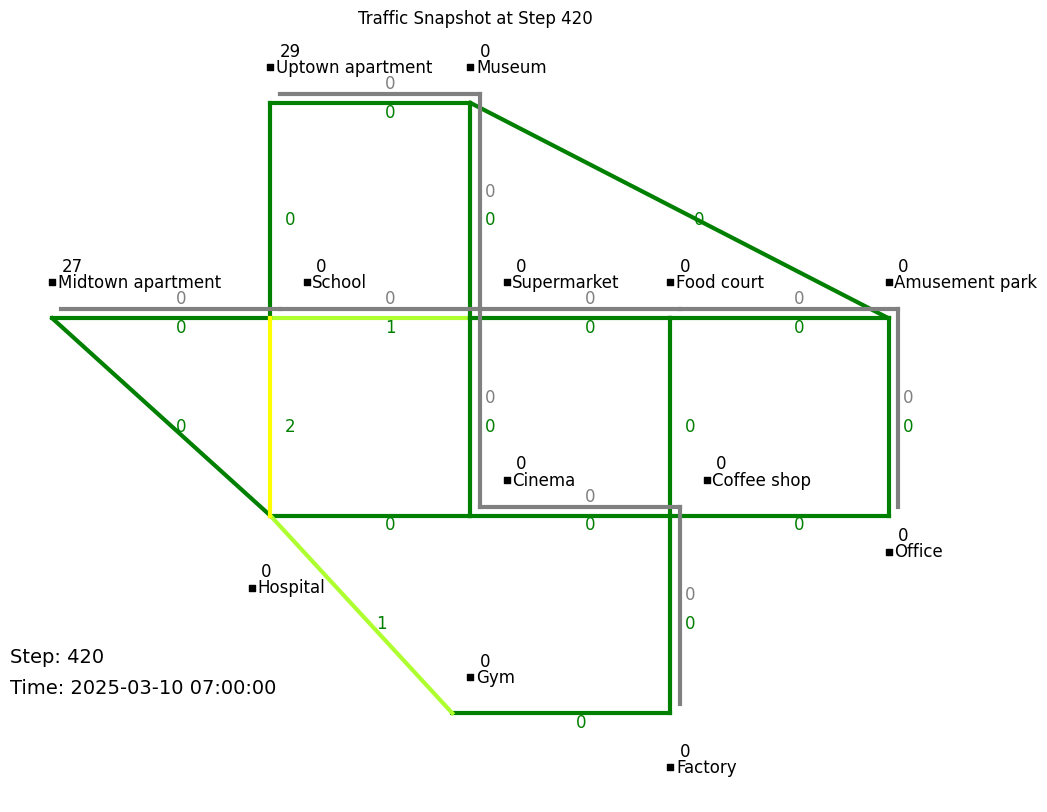

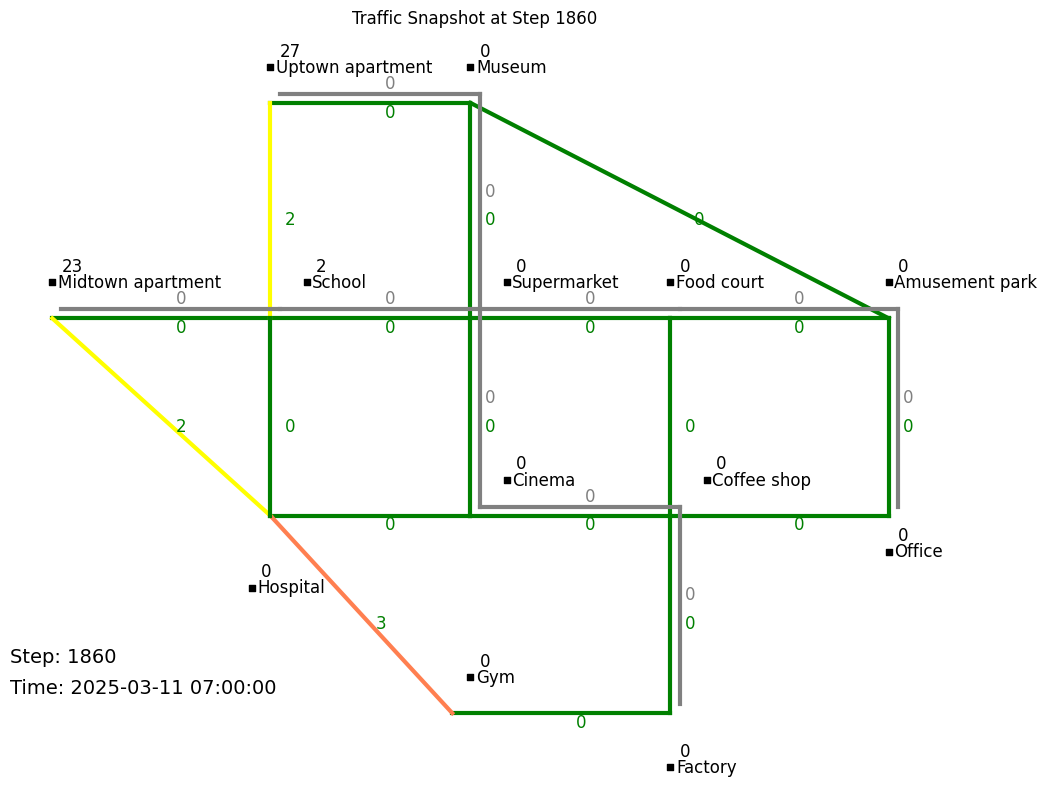

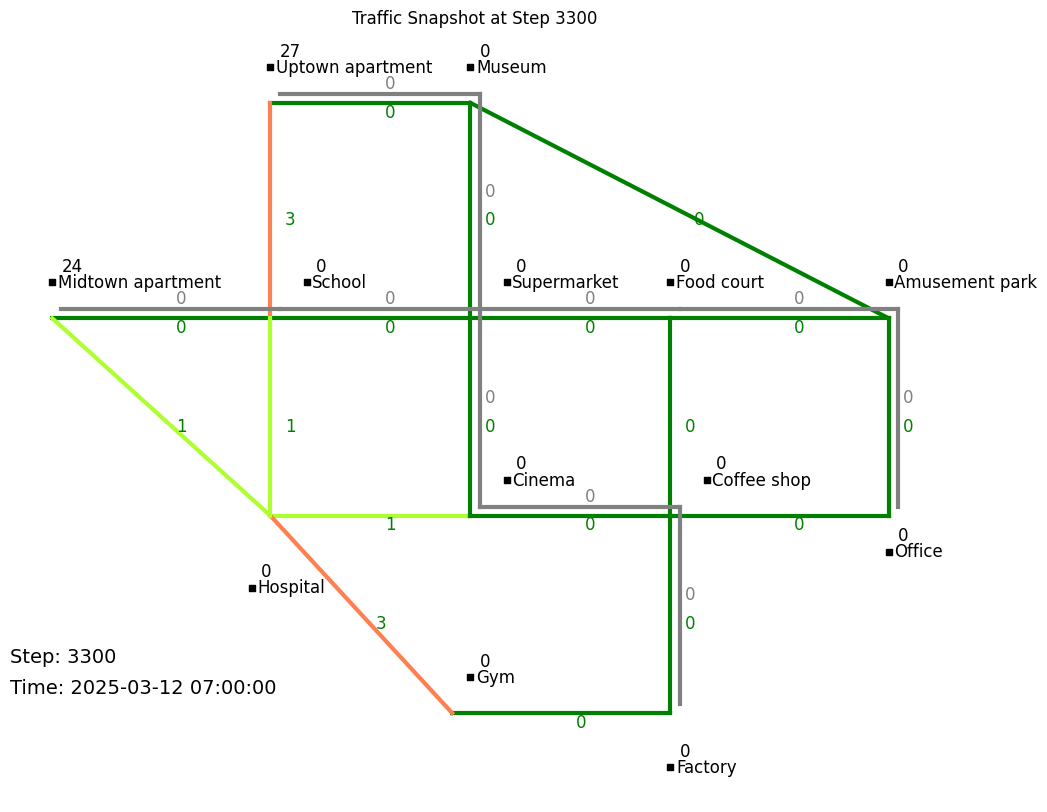

In [2]:
morning_steps = [420]#list(range(420, 541, 60))
steps = morning_steps + [i + one_day for i in morning_steps] + [i + one_day * 2 for i in morning_steps]   # example: one snapshot per hour from 6am to 10am
for step in steps:
    plot_snapshot(step, step_data[step])

## 7:30

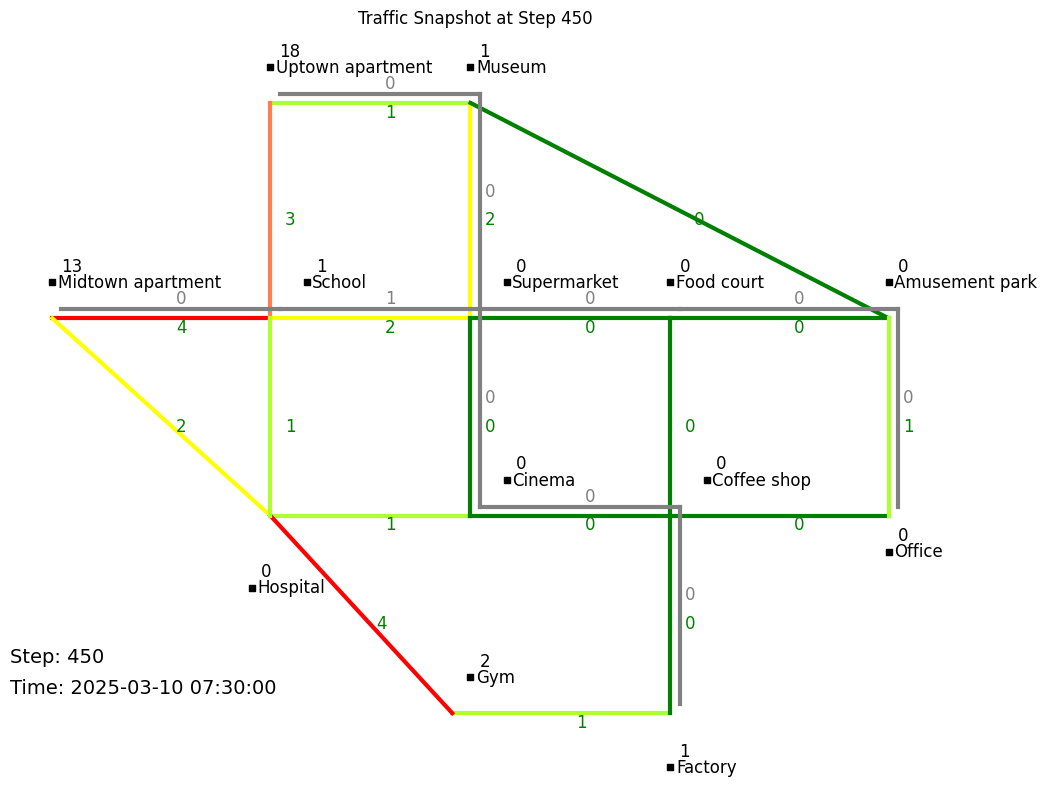

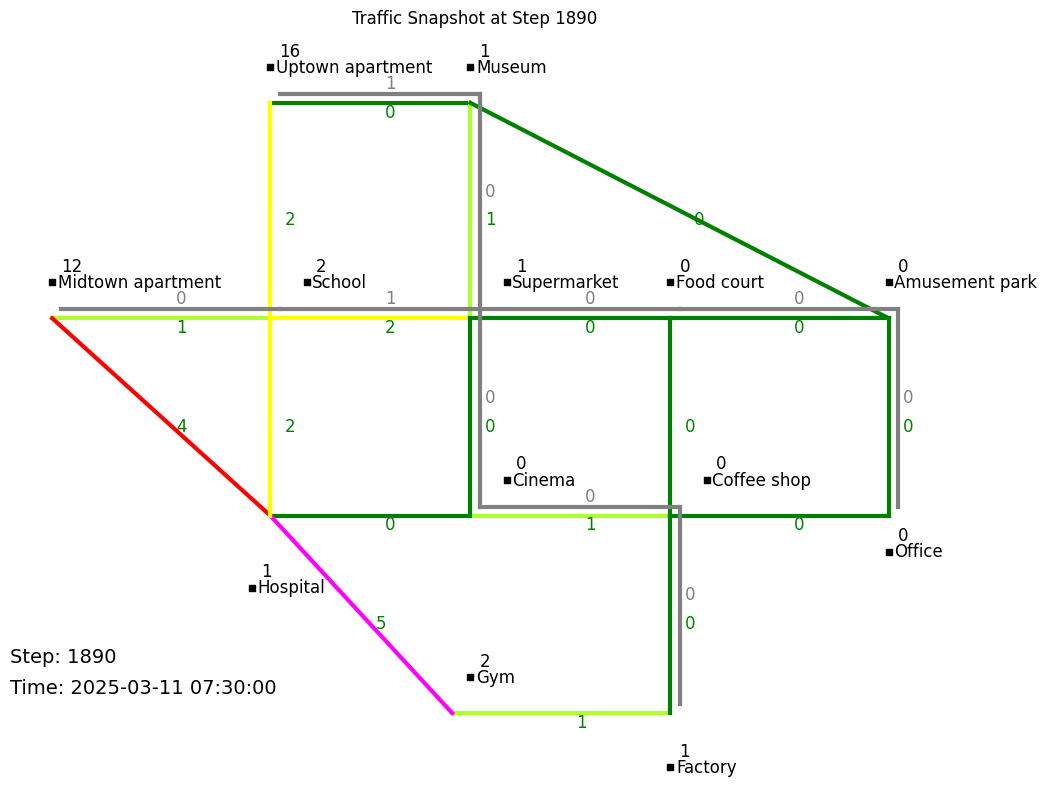

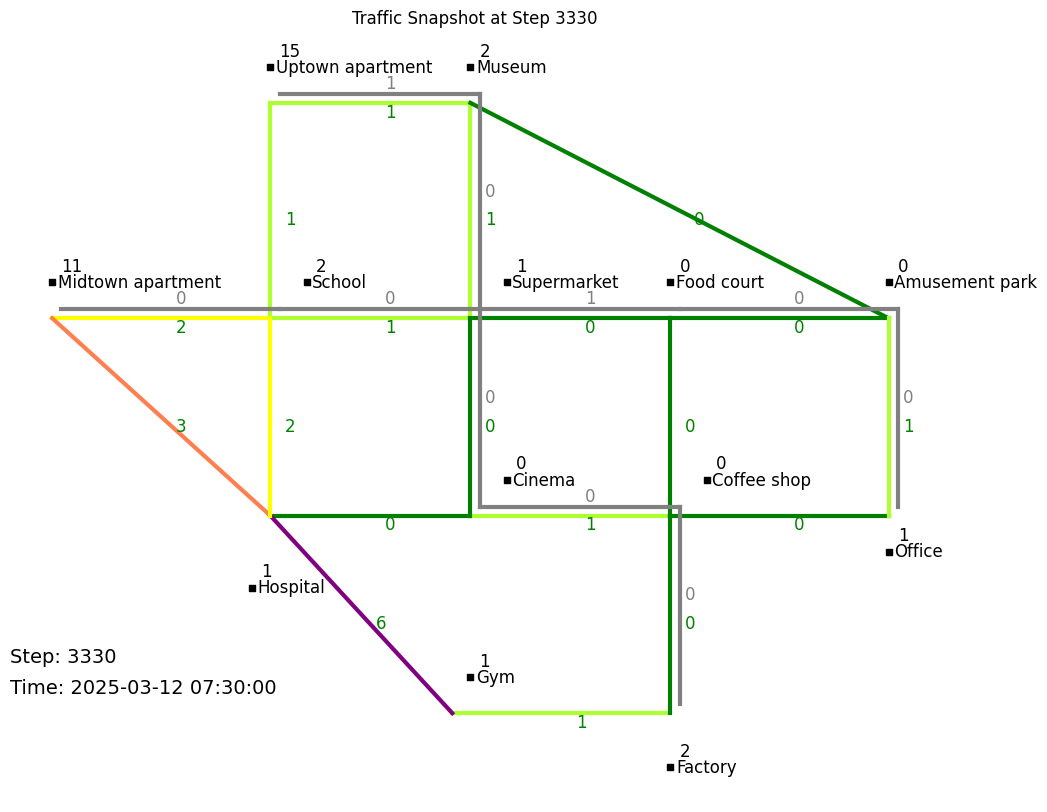

In [3]:
morning_steps = [450]#list(range(420, 541, 60))
steps = morning_steps + [i + one_day for i in morning_steps] + [i + one_day * 2 for i in morning_steps]   # example: one snapshot per hour from 6am to 10am
for step in steps:
    plot_snapshot(step, step_data[step])

## 8:00

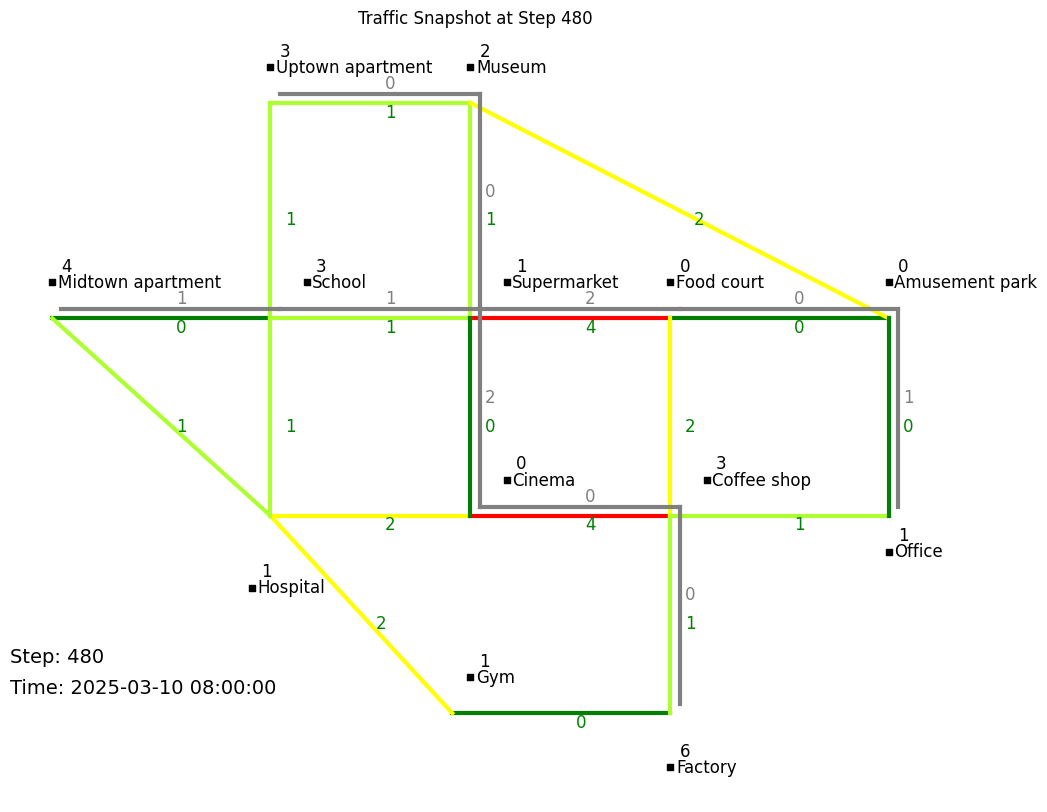

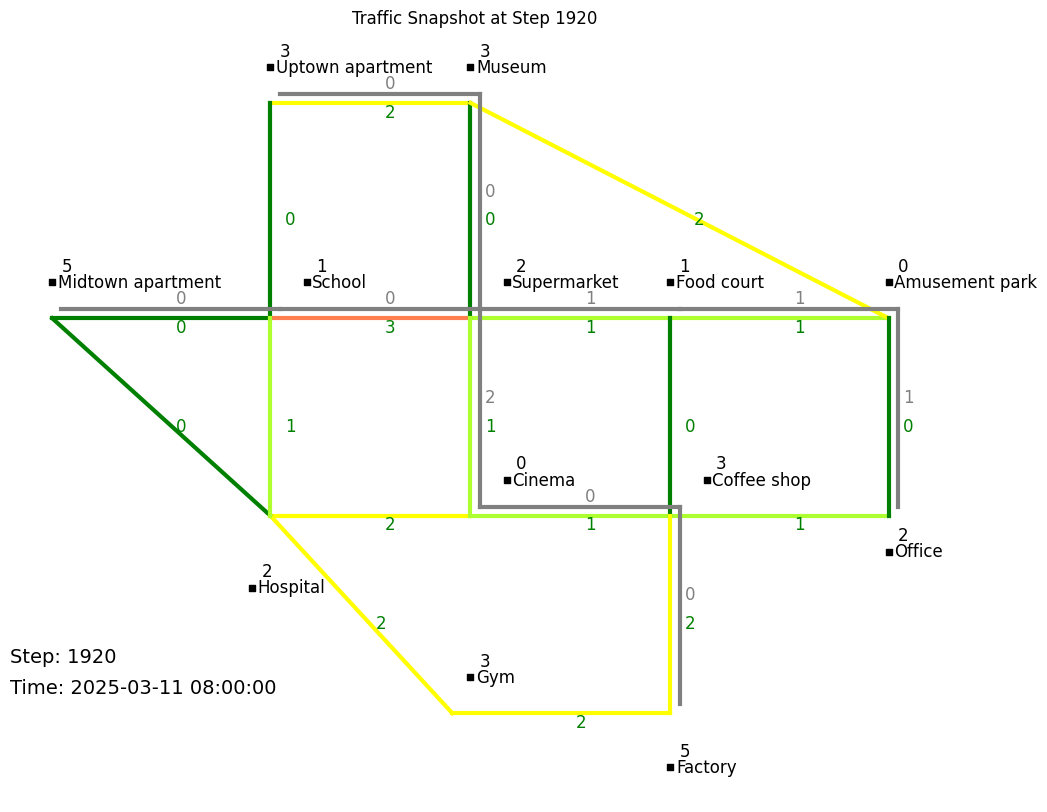

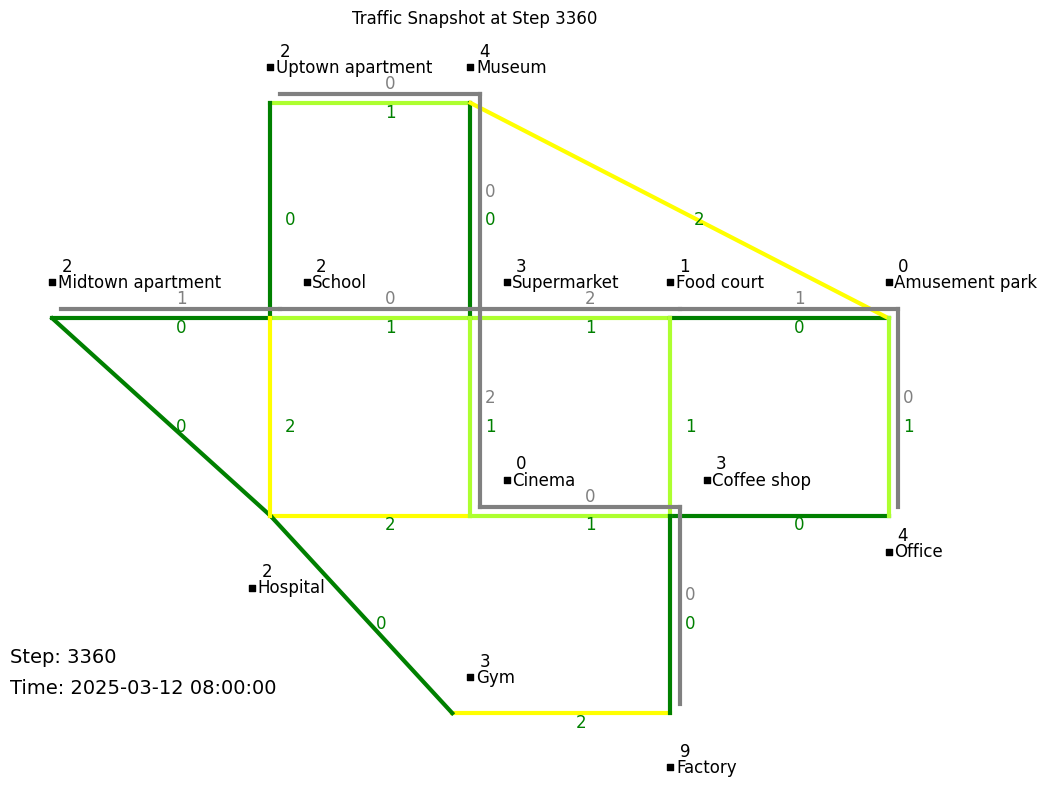

In [4]:
morning_steps = [480]#list(range(420, 541, 60))
steps = morning_steps + [i + one_day for i in morning_steps] + [i + one_day * 2 for i in morning_steps]   # example: one snapshot per hour from 6am to 10am
for step in steps:
    plot_snapshot(step, step_data[step])

## 8:30

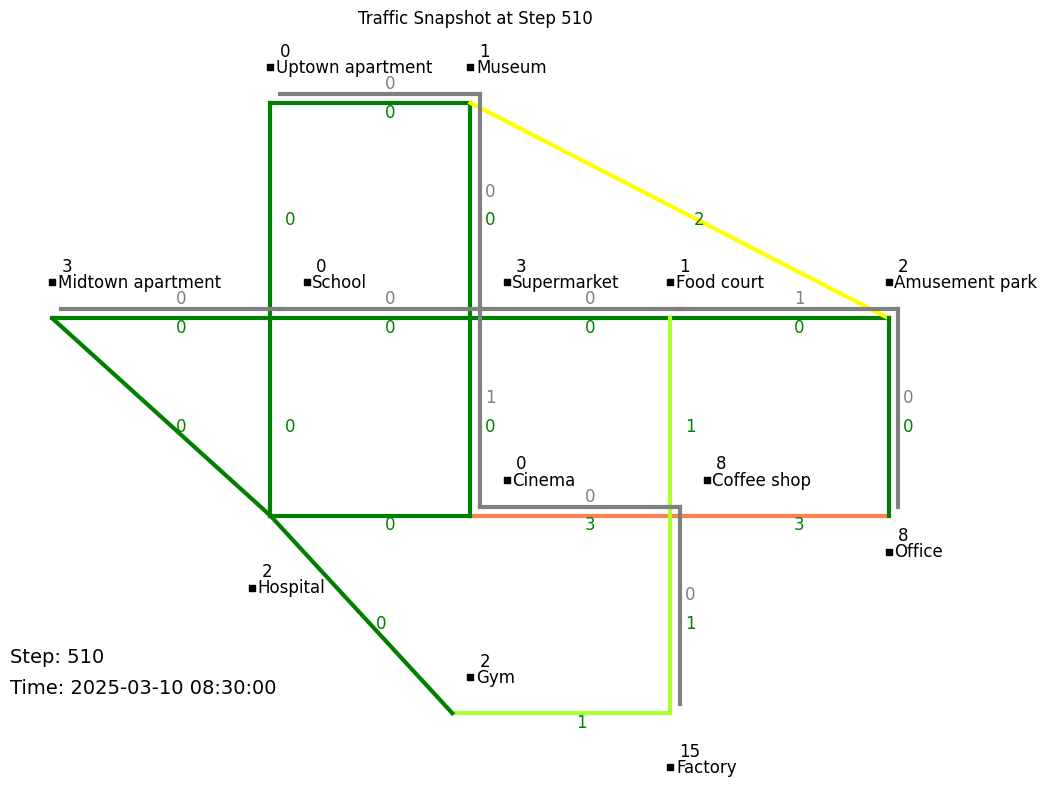

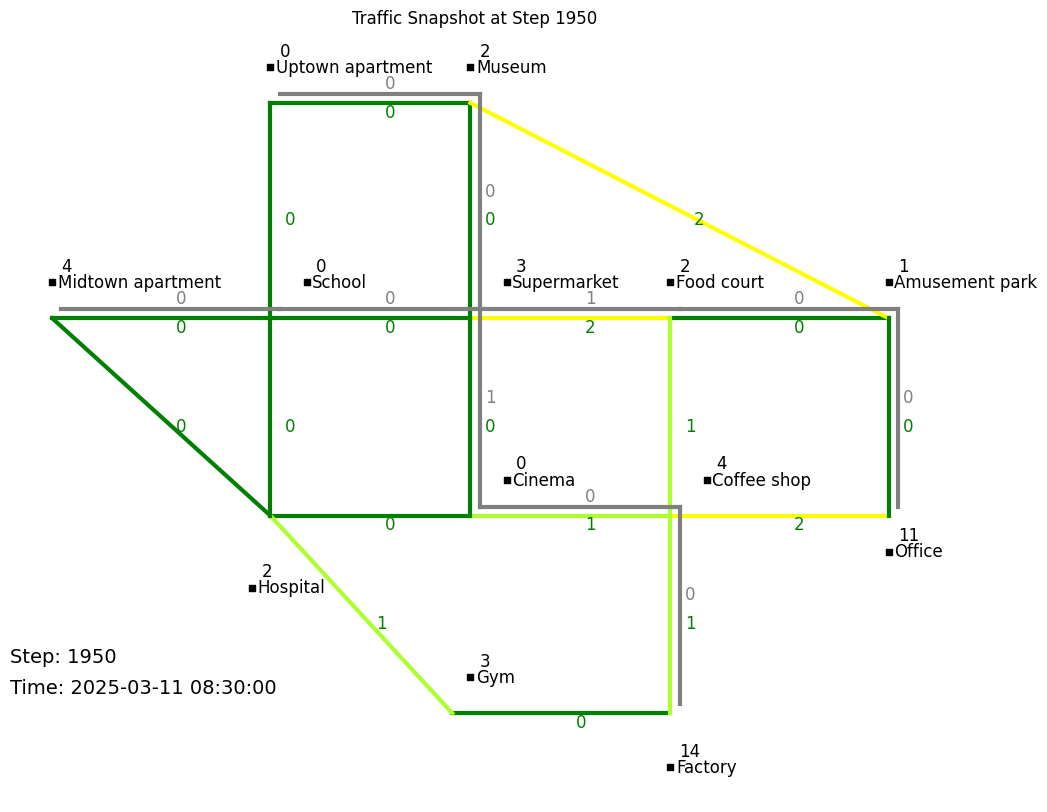

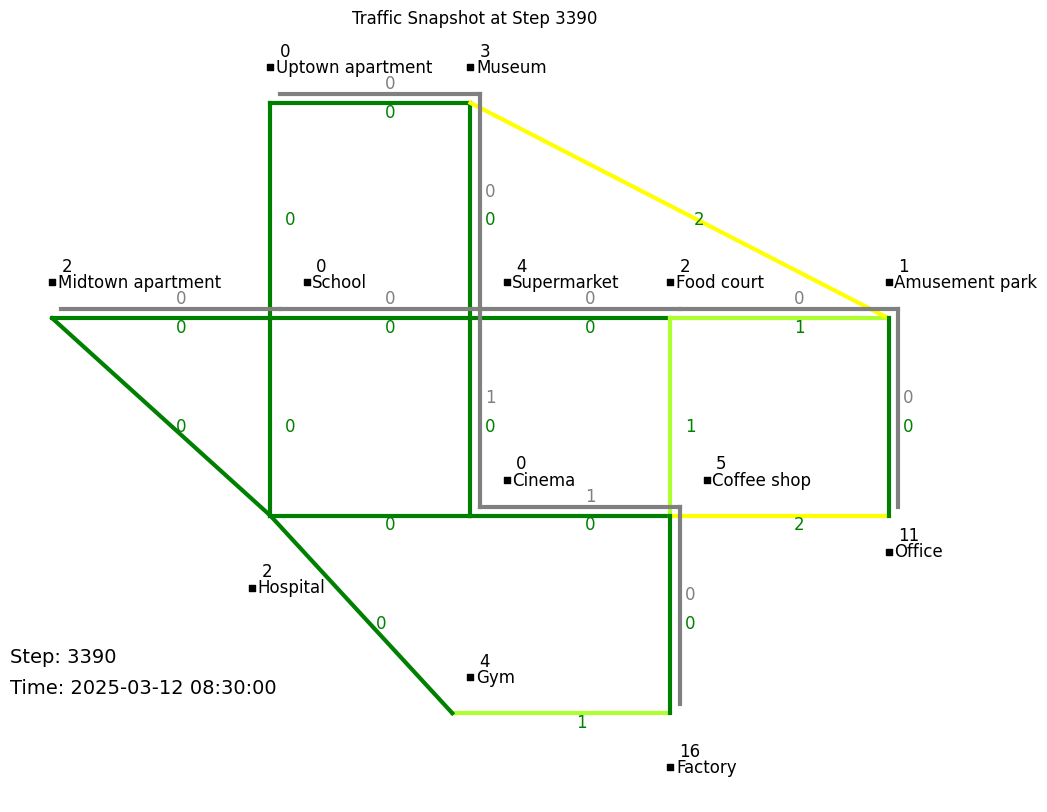

In [5]:
morning_steps = [510]#list(range(420, 541, 60))
steps = morning_steps + [i + one_day for i in morning_steps] + [i + one_day * 2 for i in morning_steps]   # example: one snapshot per hour from 6am to 10am
for step in steps:
    plot_snapshot(step, step_data[step])